## `1.` Overview

The first step of data analysis process is to **question**:

1. Do wines with higher alcoholic content receive better ratings?
2. Do sweeter wines receive higher ratings?
3. What level of acidity receives the highest average rating?

Then, the data analysis process takes steps as following:
- Wrangle 
- Expore
- Draw conclusion
- Communicate

## `2.` Assessing and Building Intuition
Once you have your data loaded into dataframes, Pandas makes a quick investigation of the data really easy. Let's explore some helpful methods for assessing and building intuition about a dataset. We can use the cancer data from before to help us.

Gathering. assessing and cleaning take key parts of data wrangling. Here, we assume that the dataset is clean so we skip cleaning process.

### Importing Data
First, import the necessary packages and load `winequality-red.csv` and `winequality-white.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_df = pd.read_csv('winequality-red.csv')
white_df = pd.read_csv('winequality-white.csv')

In [3]:
red_df.head() # looks messy, but the solution is simple as they are seperated by ; 

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [4]:
#loading csv files again with seperator ; assigned
red_df = pd.read_csv('winequality-red.csv', sep = ';')
white_df = pd.read_csv('winequality-white.csv', sep = ';')

In [5]:
print(red_df.info())
red_df.head() # good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print(white_df.info())
white_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Assessing Data

Simply inspect three aspects: null values, duplicated values, datatypes.
<br> Plus, reorganize column names to faciliate indexing.

#### Missing values
We already inspected by using .info() method and found no missing values. There is another way to investiage.

In [7]:
print(red_df.isnull().any(axis = 0).sum()) # no missing value 
print(white_df.isnull().any(axis = 0).sum()) # no missing value 

0
0


#### Duplicated values

In [8]:
print(red_df.duplicated().sum())
print(white_df.duplicated().sum()) # there seem quite many duplicated values ??!!??

240
937


In [9]:
red_df[red_df.duplicated()] # it looks fine - values could be same, which resulted duplication

#it might be better if we had a unique identifier (like id) 
#and then we can set a subset to sort by identifier to check real duplication

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### Datatypes
All numerical values: quality is integer and the rest are float, which is reasonable.

#### Change column names
It is better not to have whitespace in column names for conditional flitering.

In [10]:
red_df.columns == white_df.columns #both dataframes share the same columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
new_columns = []

for col in red_df.columns:
    col = col.replace(' ','_') #replacing whitespace with '_'
    new_columns.append(col)

In [12]:
red_df.columns = new_columns
white_df.columns = new_columns

### Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [13]:
# create color array for red dataframe
column_red = np.repeat('red', red_df.shape[0]) #repeating as much as the number of rows

# create color array for white dataframe
column_white = np.repeat('white', white_df.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [14]:
red_df['color'] = column_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
white_df['color'] = column_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [35]:
#reindex and raise ValueError on creating index with duplicates
wine_df = red_df.append(white_df, ignore_index = True, verify_integrity = True)
print(white_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB
None


### Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [36]:
wine_df.to_csv('winequality_edited.csv', index = False)

---
## `3`. EDA with Visuals
Create visualizations to **explore** and answer the quiz questions below this notebook. Use `winequality_edited.csv`. You should've created this data file in the previous section: *Appending Data (cont.)*.

In [1]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality_edited.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Histograms for Various Features

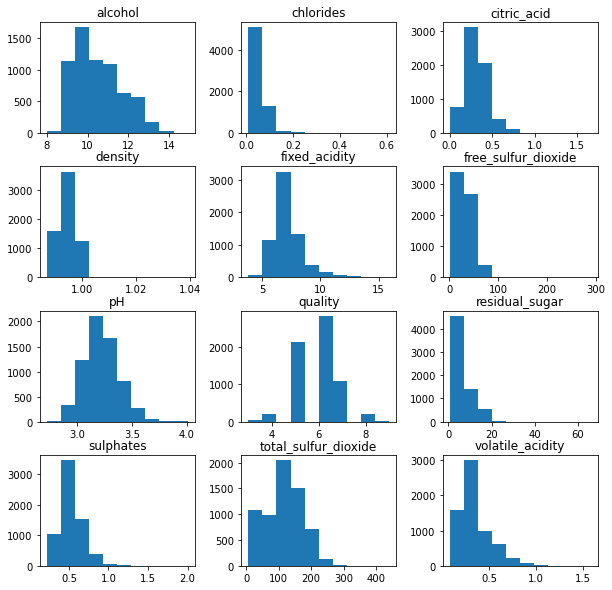

In [46]:
df.hist(figsize = [10,10], grid = False);

### Scatterplots of Quality Against Various Features

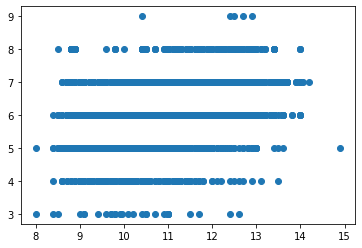

In [66]:
plt.scatter(data=df, y='quality', x='alcohol');

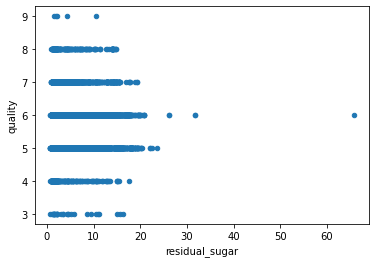

In [50]:
df.plot(kind='scatter', y='quality', x='residual_sugar');

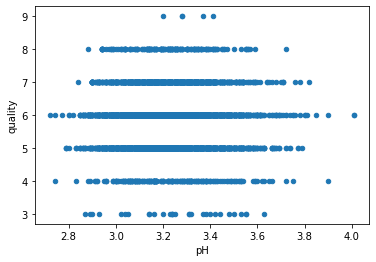

In [52]:
df.plot(kind='scatter', y='quality', x='pH');

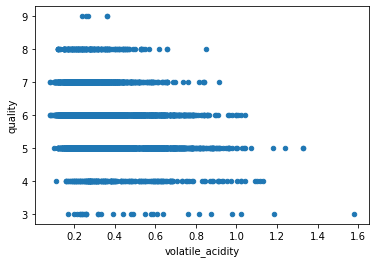

In [68]:
df.plot(kind='scatter', y='quality', x='volatile_acidity');

----
## `4-1.` Drawing Conclusions Using Groupby

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# Load 'winequality_edited.csv,' a file you created in a previous section 
df = pd.read_csv('winequality_edited.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Is a certain type of wine associated with higher quality?

In [232]:
# Find the mean quality of each wine type (red and white) with groupby
qualityRating_by_color = df.groupby('color').mean()['quality']
qualityRating_by_color

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

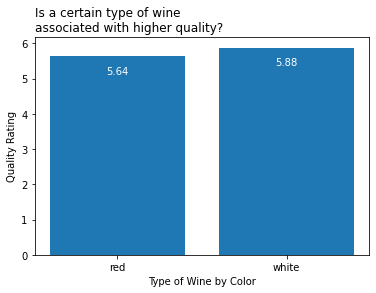

In [233]:
x = qualityRating_by_color.index.tolist()
y = qualityRating_by_color.values.tolist()

plt.bar(x,y);
plt.title("Is a certain type of wine\nassociated with higher quality?", loc='left')
plt.xlabel("Type of Wine by Color",)
plt.ylabel("Quality Rating");
for i in range(wineQuality.shape[0]):
    plt.text(x[i], y[i]-0.5, round(y[i],2), horizontalalignment='center', color='white')

On average, white wines are likely to have a slightly better quality rating than red wines. <br>The difference is small by 0.24 points.

### What level of acidity receives the highest average rating?

In [153]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
print(df.pH.describe())

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64


In [154]:
summary_pH = df.pH.describe()[3:] #5 number summary
summary_pH

min    2.72
25%    3.11
50%    3.21
75%    3.32
max    4.01
Name: pH, dtype: float64

In [158]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = summary_pH.values
print(bin_edges)

# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']
print(bin_names)

[2.72 3.11 3.21 3.32 4.01]
['high', 'mod_high', 'medium', 'low']


In [160]:
# Creates acidity_levels column (hint: pd.cut)
df['acidity_levels'] = pd.cut(df.pH, bins=bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [231]:
qualityRating_by_acidity = df.groupby('acidity_levels').mean()['quality']
print(qualityRating_by_acidity)

acidity_levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64


In [161]:
# Save changes for the next section
df.to_csv('winequality_edited.csv', index=False)

---
## `4-2.` Drawing Conclusions Using df.query

In [186]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### Do wines with higher alcoholic content receive better ratings?

In [191]:
# get the median amount of alcohol content
np.median(df.alcohol)

10.3

In [196]:
# select samples with alcohol content less than the median
low_alcohol = df.query("alcohol < 10.3")

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query("alcohol >= 10.3")

# ensure these queries included each sample exactly once
df.shape[0] == low_alcohol.shape[0] + high_alcohol.shape[0]

True

In [205]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

### Do sweeter wines receive better ratings?

In [200]:
# get the median amount of residual sugar
median_sugar = df.residual_sugar.median()
median_sugar

3.0

In [203]:
# select samples with residual sugar less than the median
low_sugar = df.query("residual_sugar < 3.0")

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query("residual_sugar >= 3.0")

# ensure these queries included each sample exactly once
df.shape[0] == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [204]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

---
## `5.` Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query. Plotting will faciliate data analysts to **draw conclusions and communicate** key findings.

In [208]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [223]:
# Use query to select each group and get its mean quality
median = df.alcohol.median()
low_alcohol = df.query('alcohol < {}'.format(median))
high_alcohol = df.query('alcohol >= {}'.format(median))

avgQuality_lowAlcohol = low_alcohol.quality.mean()
avgQuality_highAlcohol = high_alcohol.quality.mean()

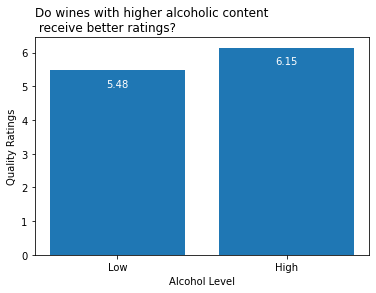

In [246]:
# Create a bar chart with proper labels
labels = ['Low','High']
heights=[avgQuality_lowAlcohol, avgQuality_highAlcohol] 

plt.bar(x=labels, height=heights);
plt.xlabel('Alcohol Level')
plt.ylabel('Quality Ratings')
plt.title('Do wines with higher alcoholic content\n receive better ratings?', loc='left')    

for i in range(len(heights)):
    plt.text(labels[i], heights[i]-0.5, s='{:.2f}'.format(heights[i]), 
             horizontalalignment='center', color='w')

On average, it is likely that wines that contain higher alcohol receive better quality ratings. <br>The average difference is around 0.67 points.

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [221]:
# Use query to select each group and get its mean quality
# Use query to select each group and get its mean quality
median = df.residual_sugar.median()
low_sugar = df.query('residual_sugar < {}'.format(median))
high_sugar = df.query('residual_sugar >= {}'.format(median))

avgQuality_lowSugar = low_sugar.quality.mean()
avgQuality_highSugar = high_sugar.quality.mean()

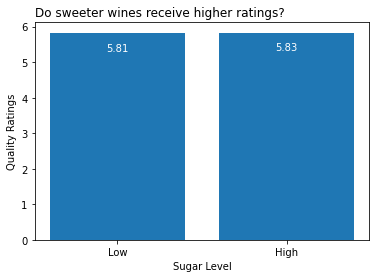

In [247]:
# Create a bar chart with proper labels
labels = ['Low','High']
heights=[avgQuality_lowSugar, avgQuality_highSugar] 

plt.bar(x=labels, height=heights);
plt.xlabel('Sugar Level')
plt.ylabel('Quality Ratings')
plt.title('Do sweeter wines receive higher ratings?', loc='left')    

for i in range(len(heights)):
    plt.text(labels[i], heights[i]-0.5, s='{:.2f}'.format(heights[i]), 
             horizontalalignment='center', color='w')

On average, quality ratings are less likely to be influenced by sugar level, 
<br>although wines that contain high sugar level have very slightly higher quality rating by 0.02 points.

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels. 

In [234]:
# Use groupby to get the mean quality for each acidity level
qualityRating_by_acidity = df.groupby('acidity_levels').quality.mean()
qualityRating_by_acidity

acidity_levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

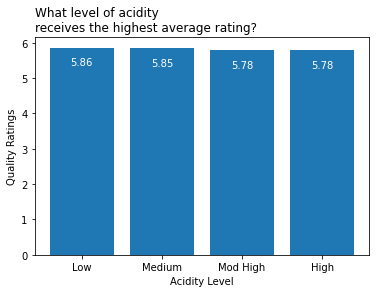

In [245]:
location = [4, 1, 2, 3] #reorder from low to high
heights = qualityRating_by_acidity
labels = qualityRating_by_acidity.index.str.replace('_',' ').str.title()

plt.bar(location, heights, tick_label=labels);
plt.xlabel('Acidity Level')
plt.ylabel('Quality Ratings')
plt.title('What level of acidity\nreceives the highest average rating?', loc='left')

for i in range(len(labels)):
    plt.text(location[i], heights[i]-0.5, s='{:.2f}'.format(heights[i]), 
             horizontalalignment='center', color='w');

On average, wines with low acidity tend to have a slightly better ratings than those with higher acidity.